# Greenhouse Gases Pollution and Temperature Analysis for Washington

                                                                            -Maitrey Talware (mt3915)

                                                                            

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Introduction </a></li>
        <li><a href="#ref2">Data Importing and Cleaning</a></li>
        <ul>
         <li><a href="#ref3">2.1 Importing Greenhouse Pollution Datset</a></li>
            <ul>
                <li><a href="#ref4">Data Transformation</a></li>
            </ul>
        <li><a href="#ref4">2.2 Importing Temperature Dataset</a></li>
        </ul>
        <li><a href="#ref5">Combining both the Dataset</a></li>
        <li><a href="#ref5">Exploratory Data Analysis</a></li>
            <ul>
                <li><a href="#ref6">4.1 Descriptive Statistics</a></li>
                <li><a href="#ref6">4.2 Line Plots</a></li>
       <li><a href="#ref6">4.3 Correlation heatmap</a></li>
        </ul>
        <li><a href="#ref7">Model /Methodology</a></li>
                    <ul>
                <li><a href="#ref6">5.1 Train - Test Split</a></li>
                <li><a href="#ref6">5.2 Data transformed to stationary</a></li>
                <li><a href="#ref6">5.3 Stationary Check</a></li>
       <li><a href="#ref6">5.4 Granger's Causality Test</a></li>
                  <li><a href="#ref6">5.5 Vector Auto Regressive Model Building</a></li>
                  <li><a href="#ref6">5.6 Prediction on test set</a></li>
                  <li><a href="#ref6">5.7 Model Evaluation</a></li>
        </ul>
        <li><a href="#ref7">Forecasting</a></li>
                    <ul>
                <li><a href="#ref6">6.1 Forecasting based on VAR model</a></li>
                <li><a href="#ref6">6.2 Forecasting Individually</a></li>
        </ul>
        <li><a href="#ref8">Result section</a></li>
        <li><a href="#ref9">Conclusion section</a></li>
    </ol>
</div>
<br>

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 1. Introduction

Vector Autoregression (VAR) is a multivariate forecasting algorithm that is used when two or more time series influence each other.

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 2. Data Importing and Data Cleaning

## 2.1 Importing and Cleaning Greenhouses gases pollution Dataset

<ul>
<li><a href="https://www.kaggle.com/sogun3/uspollution">Dataset Link </a></li>
<li>Dataset has various columns, selected only the required columns while importing</li>
<li>Based on our results from Exploratory Data Analysis we will be working on Washington</li>
</ul>

In [1]:
# ------ Importing Libraries --------
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# ------ importing Dataset -------------
df=pd.read_csv("pollution_us_2000_2016.csv",usecols=['City','Date Local','NO2 Mean','O3 Mean','SO2 Mean','CO Mean'])
#----------- Filtering City ----------------
df=df[df['City']=='Washington']
df['Date Local']=pd.to_datetime(df['Date Local'], format='%Y-%m-%d') # Converting to datetime
# Getting to same date range as for temperature data
df=df[df['Date Local']<'2013-09-01']
# Grouping as some measurements are taken multiple timesa a day
df=df.groupby(['Date Local']).mean()
df.head()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
Date Local,,,,
2000-01-01,26.541667,0.004167,11.237500,2.033882
2000-01-02,14.958333,0.023083,7.777083,0.770833
2000-01-03,18.291667,0.014875,7.116149,0.583333
2000-01-04,13.363636,0.017250,5.402083,0.508333
2000-01-05,16.625000,0.009583,8.362500,0.616667


### 2.1.A Data Transformations:  
<ul>
<li>Re sampling data from day to month by aggregating</li></ul>

In [2]:
#taking sum of daily values to get monthly values
df=df.resample('M').sum()
df.index = [pd.datetime(x.year, x.month, 1) for x in df.index.tolist()] 
df.head()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
2000-01-01,683.300847,0.364102,358.045716,32.160386
2000-02-01,539.821081,0.357543,284.939440,35.490968
2000-03-01,782.589332,0.497125,202.283723,38.381430
2000-04-01,666.711299,0.546877,156.879679,33.645470
2000-05-01,695.437038,0.865069,199.120191,26.834821


## 2.2 Importing and Cleaning Temperature Dataset
<ul>
    <li><a href="https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data">Dataset Link</a></li>
<li>Dataset has various columns, selected only the required columns while importing</li>
<li>Based on our results from Exploratory Data Analysis we will be working on Washington</li>
</ul>

In [3]:
df_t=pd.read_csv("GlobalLandTemperaturesByCity.csv",usecols=['dt','City','AverageTemperature','AverageTemperatureAnomaly'])
df_t= df_t[df_t['City']=='Washington'] #filtering for city
df_t=df_t[df_t['dt']<'2017-01-01'] # getting it to same date range as Greenhouse dataset
df_t=df_t[df_t['dt']>'1999-12-31']
df_t=df_t.set_index('dt')
df_t=df_t.drop('City',axis=1)
df_t.head()

,AverageTemperature,AverageTemperatureAnomaly
dt,,
2000-01-01,-0.097,0.214
2000-02-01,3.380,0.267
2000-03-01,9.113,0.144
2000-04-01,11.591,0.165
2000-05-01,18.559,0.191


  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 3. Creating a combined Dataset

In [4]:
data=df.join(df_t) #joining dataset on Index
data2=data
data.head()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,AverageTemperature,AverageTemperatureAnomaly
2000-01-01,683.300847,0.364102,358.045716,32.160386,-0.097,0.214
2000-02-01,539.821081,0.357543,284.939440,35.490968,3.380,0.267
2000-03-01,782.589332,0.497125,202.283723,38.381430,9.113,0.144
2000-04-01,666.711299,0.546877,156.879679,33.645470,11.591,0.165
2000-05-01,695.437038,0.865069,199.120191,26.834821,18.559,0.191


In [5]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# data[['NO2 Mean', 'O3 Mean','SO2 Mean','CO Mean','AverageTemperature','AverageTemperatureUncertainty']] = min_max_scaler.fit_transform(data[['NO2 Mean', 'O3 Mean','SO2 Mean','CO Mean','AverageTemperature','AverageTemperatureUncertainty']])
# data.head()

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 4. Exploratory Data Analysis

### 4.1 Descriptive Statistics

In [6]:
data.describe()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,AverageTemperature,AverageTemperatureAnomaly
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,572.222071,0.722087,153.995432,27.434185,13.037201,0.266122
std,149.254079,0.281823,80.721808,10.815724,8.873630,0.080509
min,191.463189,0.175498,22.854362,4.092327,-2.789000,0.074000
25%,469.356865,0.485365,94.277452,19.755956,4.833250,0.209750
50%,572.698393,0.691781,143.771550,26.761309,12.808000,0.254000
75%,670.800837,0.928430,202.037908,34.845219,21.785250,0.308500
max,991.249834,1.308212,427.118956,70.988059,26.895000,0.503000


### 4.2.A Line chart 

In [7]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [8]:
data.iplot(kind='line', xTitle='Time (years)',yTitle='Greenhouses gases in ppm', title='Greenhouses gases Emission over Time')

### 4.2.A Ploting Individually 

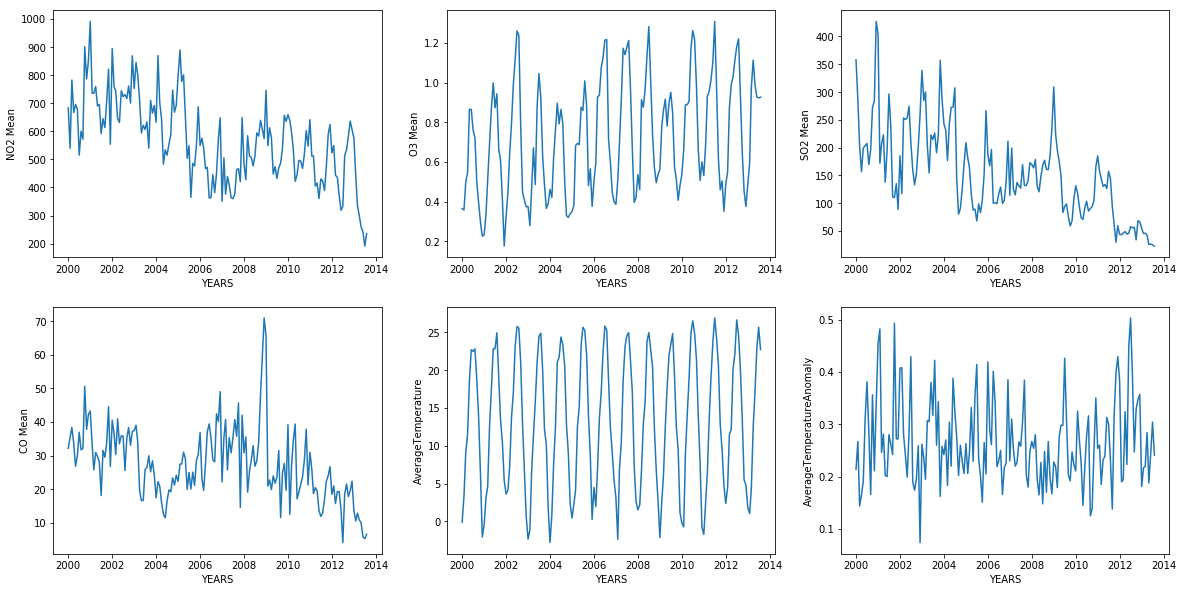

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
plt.plot(data['NO2 Mean'])
plt.xlabel("YEARS")
plt.ylabel('NO2 Mean')

plt.subplot(2, 3, 2)
plt.plot(data['O3 Mean'])
plt.xlabel("YEARS")
plt.ylabel('O3 Mean')

plt.subplot(2, 3, 3)
plt.plot(data['SO2 Mean'])
plt.xlabel("YEARS")
plt.ylabel('SO2 Mean')

plt.subplot(2, 3, 4)
plt.plot(data['CO Mean'])
plt.xlabel("YEARS")
plt.ylabel('CO Mean')

plt.subplot(2, 3, 5)
plt.plot(data['AverageTemperature'])
plt.xlabel("YEARS")
plt.ylabel('AverageTemperature')

plt.subplot(2, 3, 6)
plt.plot(data['AverageTemperatureAnomaly'])
plt.xlabel("YEARS")
plt.ylabel('AverageTemperatureAnomaly')


plt.show()

### 4.3.A Correlation

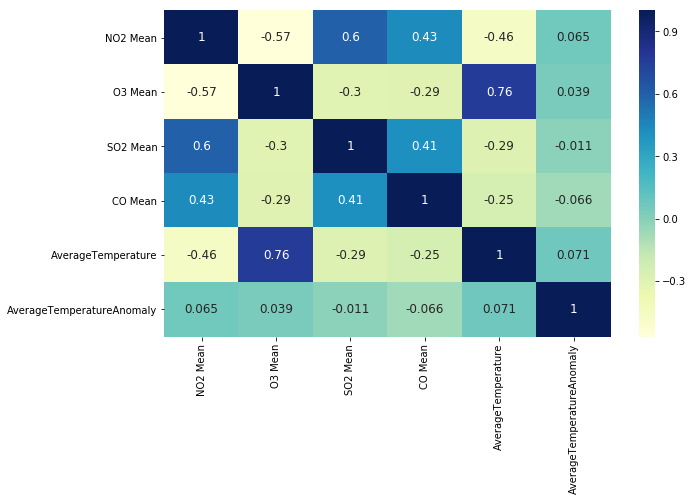

In [10]:
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#corr

It is neccesary to remove trend before calculating correlation. We remove seasonality from data by taking first order differencing
### 4.3.B Correlation after first order differencing

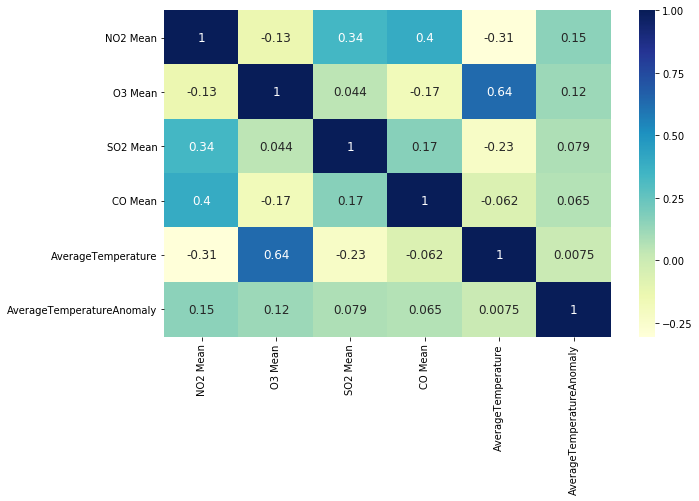

In [11]:
corr1=data.diff().dropna().corr()
sns.heatmap(corr1,xticklabels=corr1.columns.values,yticklabels=corr1.columns.values,annot=True,annot_kws={'size':12},cmap='YlGnBu')
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### *Observations:*  

**AverageTemperatureAnomaly is postively correlated to all the greenhouse gases to some extent.
This is what we want to convey through this project that temperature change is related to greenhouse gases. As correlation does not mean causation we need some strong proof to prove our point. (Done in further analysis)**

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 5. Model Methodology 

***We will be using Vector Auto Regressive Model for Time Series Forecasting***

### 5.1 Train Test Split

In [12]:
number_test=30
X_train,X_test=data[0:-number_test],data[-number_test:]
print(X_train.shape)
print(X_test.shape)

(134, 6)
(30, 6)


### 5.2 Transformation 
**Making the timeseries stationary is important in order to proceed**


In [13]:
transform_data=X_train.diff().dropna()
transform_data.head()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,AverageTemperature,AverageTemperatureAnomaly
2000-02-01,-143.479766,-0.006559,-73.106276,3.330582,3.477,0.053
2000-03-01,242.768251,0.139582,-82.655717,2.890463,5.733,-0.123
2000-04-01,-115.878033,0.049752,-45.404044,-4.735961,2.478,0.021
2000-05-01,28.725739,0.318192,42.240511,-6.810649,6.968,0.026
2000-06-01,-16.284043,-0.001031,4.487060,3.128528,4.130,0.120


### 5.3 Stationary Check
<ul>
<li>Using adfuller_test to check for stationarity as VAR works on stationary series</li>
</ul>

In [14]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series,signif=0.05,name='',verbose=False):
    r=adfuller(series,autolag='AIC')
    output={'test_statistic':round(r[0],4),'pvalue':round(r[1],4),'n_lags':round(r[2],4),'o_obs':r[3]}
    p_value=output['pvalue']
    def adjust(val,length=6):return str(val).ljust(length)
    
    print(f'Augemented Dickey Fuller Test on "{name}"',"\n ",'-'*47)
    print(f'Null Hypothesis: Data has unit root. Non Stationary')
    print(f'Significance Level   ={signif}')
    print(f'test stats   ={output["test_statistic"]}')
    print(f'No. lags chosen   ={output["n_lags"]}')
    
    for key,val in r[4].items():
          print(f'Critical Value {adjust(key)}={round(val,3)}')
    if p_value<=signif:
          print(f" => P-value={p_value}. Rejecting Null Hypothesis")
          print(f" => Series is Stationary")
          
    else:
      print(f" => P-value={p_value}. Weak, to reject Null Hypothesis")
      print(f" => Series is Non-Stationary")

for name, column in transform_data.iteritems():
          adfuller_test(column,name=column.name)
          print("\n")


Augemented Dickey Fuller Test on "NO2 Mean" 
  -----------------------------------------------
Null Hypothesis: Data has unit root. Non Stationary
Significance Level   =0.05
test stats   =-3.0861
No. lags chosen   =13
Critical Value 1%    =-3.487
Critical Value 5%    =-2.886
Critical Value 10%   =-2.58
 => P-value=0.0276. Rejecting Null Hypothesis
 => Series is Stationary


Augemented Dickey Fuller Test on "O3 Mean" 
  -----------------------------------------------
Null Hypothesis: Data has unit root. Non Stationary
Significance Level   =0.05
test stats   =-9.8827
No. lags chosen   =9
Critical Value 1%    =-3.485
Critical Value 5%    =-2.885
Critical Value 10%   =-2.579
 => P-value=0.0. Rejecting Null Hypothesis
 => Series is Stationary


Augemented Dickey Fuller Test on "SO2 Mean" 
  -----------------------------------------------
Null Hypothesis: Data has unit root. Non Stationary
Significance Level   =0.05
test stats   =-7.508
No. lags chosen   =5
Critical Value 1%    =-3.483
Criti

***We see that each series in stationary after first order differencing*** 
(proceeding further)

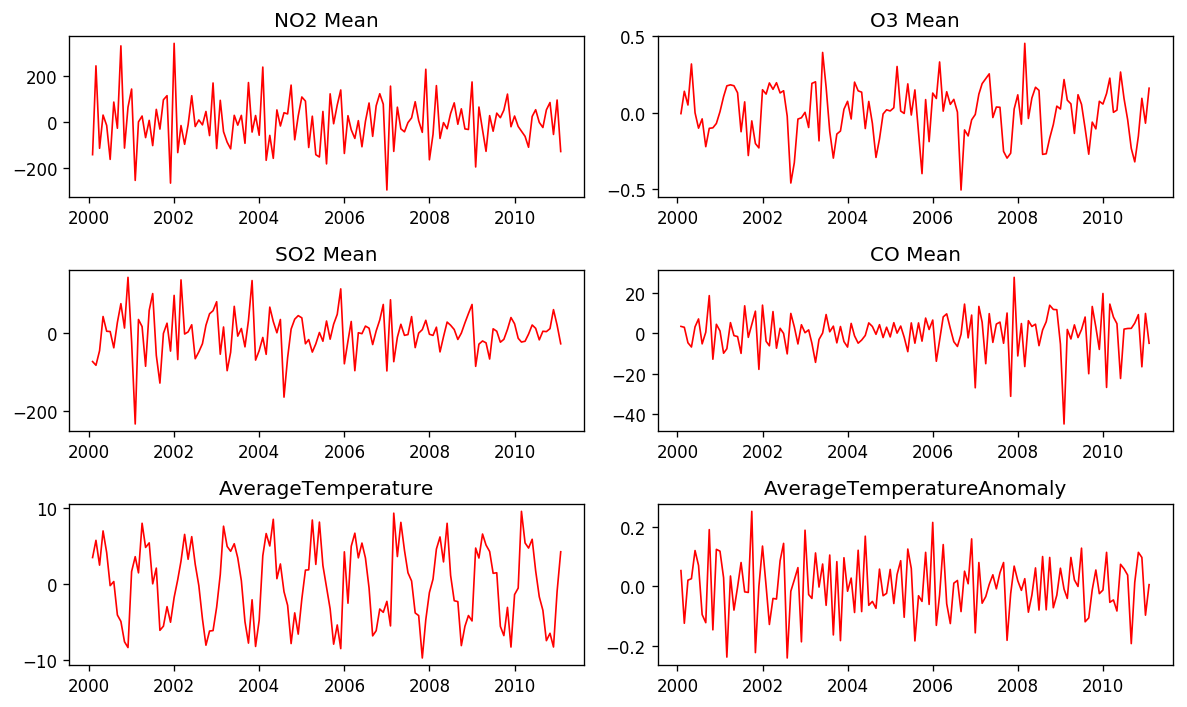

In [15]:
fig,axes=plt.subplots(nrows=3,ncols=2,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
    data=transform_data[transform_data.columns[i]]
    ax.plot(data,color='red',linewidth=1)
    
    ax.set_title(transform_data.columns[i])
plt.tight_layout();
    

**We have reached at stage where we want to prove that temperature change is caused by Greenhouse gases. As we know correlation is not enough to prove so. We will apply Granger's Causality Test**

# 5.4 Granger’s Causality Test

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=5
test="ssr_chi2test"
def grangers_causation_matrix(data,variables,test='ssr_chi2test',verbose=False):
    xtrain=pd.DataFrame(np.zeros((len(variables),len(variables))),columns=variables,index=variables)
    for c in xtrain.columns:
        for r in xtrain.index:
            test_result=grangercausalitytests(data[[r,c]],maxlag=maxlag,verbose=False)
            p_values=[round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose:print(f'Y={r},X={c},P Values={p_values}')
            min_p_value=np.min(p_values)
            xtrain.loc[r,c]=min_p_value
    xtrain.columns=[var+'_x' for var in variables]
    xtrain.index=[var+'_y' for var in variables]
    return xtrain
grangers_causation_matrix(data2,variables=data2.columns)  

,NO2 Mean_x,O3 Mean_x,SO2 Mean_x,CO Mean_x,AverageTemperature_x,AverageTemperatureAnomaly_x
NO2 Mean_y,1.0000,0.0000,0.0904,0.0714,0.0000,0.0987
O3 Mean_y,0.0000,1.0000,0.0091,0.4324,0.0000,0.3200
SO2 Mean_y,0.0034,0.0079,1.0000,0.0005,0.0056,0.0090
CO Mean_y,0.6391,0.0337,0.2297,1.0000,0.0001,0.3397
AverageTemperature_y,0.0001,0.0000,0.0000,0.0034,1.0000,0.0656
AverageTemperatureAnomaly_y,0.4422,0.3920,0.5202,0.2824,0.8824,1.0000


### Result of this test shows that NO2_mean_x, O3 Mean_x, SO2 Mean_x, CO Mean_x causes AverageTemperatureAnomaly_y	

# Cointegration Test

In [17]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(transform_data,alpha=0.05):
    out=coint_johansen(transform_data,-1,5)
    d={'0.90':0,'0.95':1,'0.99':2}
    traces=out.lr1
    cvts=out.cvt[:,d[str(1-alpha)]]
    def adjust(val,length=6):return str(val).ljust(length)
    
    print("Name : Test Stat > c(95%) ==> Signif \n, '--'*20")
    for col, trace,cvt in zip(transform_data.columns,traces,cvts):
        print(adjust(col),'::',adjust(round(trace,2),9), ">",adjust(cvt,8),' => ',trace >cvt)
cointegration_test(X_train)

Name : Test Stat > c(95%) ==> Signif 
, '--'*20
NO2 Mean :: 131.44    > 83.9383   =>  True
O3 Mean :: 57.28     > 60.0627   =>  False
SO2 Mean :: 28.07     > 40.1749   =>  False
CO Mean :: 14.66     > 24.2761   =>  False
AverageTemperature :: 3.56      > 12.3212   =>  False
AverageTemperatureAnomaly :: 0.47      > 4.1296    =>  False


# 5.5 Vector Auto Regressive Model
Main requirement of VAR model is that it requires stationarity of series, which we confirmed from augmennted Dickey-Fuller Test


In [18]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.api import VAR
mod = smt.VAR(transform_data)
res = mod.fit(maxlags=15, ic="aic")
#print(res.summary())

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [19]:
lag_order=res.k_ar
pred=res.forecast(transform_data.values[-lag_order:],number_test)
pred_df=pd.DataFrame(pred,index=data2.index[-number_test:],columns=data2.columns)
pred_df.head(2)

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,AverageTemperature,AverageTemperatureAnomaly
2011-03-01,12.691055,0.251460,-114.745869,-29.33486,6.964410,-0.167739
2011-04-01,-81.751008,-0.078677,-32.441721,0.12755,2.673734,0.062453


### 5.5.1 De differencing data (invert Transform)


In [20]:
pred_inverse=pred_df.cumsum()
f=pred_inverse+X_test
f.head(2)

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,AverageTemperature,AverageTemperatureAnomaly
2011-03-01,525.384777,1.182030,29.637067,-10.682191,13.416410,0.017261
2011-04-01,335.868620,1.129949,-16.847553,-8.748006,23.265145,0.126713


# 5.6 Prediction on test set

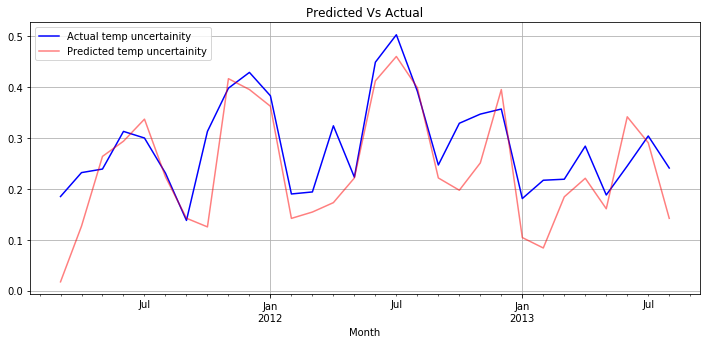

In [21]:
plt.figure(figsize=(12,5))
plt.xlabel('Month')
ax1=X_test.AverageTemperatureAnomaly.plot(color='blue',grid=True,label='Actual temp uncertainity')
ax2=f.AverageTemperatureAnomaly.plot(color='red',grid=True,label='Predicted temp uncertainity',alpha=0.5)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title("Predicted Vs Actual")
plt.show()

In [22]:
# plt.figure(figsize=(12,5))
# plt.xlabel('Month')
# ax1=X_test['CO Mean'].plot(color='black',grid=True,label='Actual temp uncertainity')
# ax2=f['CO Mean'].plot(color='red',grid=True,label='Predicted temp uncertainity',alpha=0.5)
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# plt.title("Predicted Vs Actual")
# plt.show()

In [23]:
# plt.figure(figsize=(12,5))
# plt.xlabel('Month')
# ax1=X_test['NO2 Mean'].plot(color='black',grid=True,label='Actual temp uncertainity')
# ax2=f['NO2 Mean'].plot(color='red',grid=True,label='Predicted temp uncertainity',alpha=0.5)
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# plt.title("Predicted Vs Actual")
# plt.show()

In [24]:
# plt.figure(figsize=(12,5))
# plt.xlabel('Month')
# ax1=X_test['O3 Mean'].plot(color='black',grid=True,label='Actual temp uncertainity')
# ax2=f['O3 Mean'].plot(color='red',grid=True,label='Predicted temp uncertainity',alpha=0.5)
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# plt.title("Predicted Vs Actual")
# plt.show()

In [25]:
# plt.figure(figsize=(12,5))
# plt.xlabel('Month')
# ax1=X_test['SO2 Mean'].plot(color='black',grid=True,label='Actual temp uncertainity')
# ax2=f['SO2 Mean'].plot(color='red',grid=True,label='Predicted temp uncertainity',alpha=0.5)
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# plt.title("Predicted Vs Actual")
# plt.show()

# 5.7 Model Evaluation
<ul>
    <li>Calculating Bias</li>
    <li>Calculating Mean Absolute Error</li>
    <li>Calculating Mean Squared Error</li>
    <li>Calculating Root Mean Squared Error</li>
    
</ul>

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
m=['AverageTemperatureAnomaly']
for quant in m:
    forecast_errors=[X_test[quant][i]-f[quant][i] for i in range(len(X_test[quant]))]
    print('Evaluation for',quant)
    bias=sum(forecast_errors)*1.0/len(X_test[quant])
    print('Bias: %f' %bias)

    mae=mean_absolute_error(X_test[quant],f[quant])
    print('MAE: %f'%mae)

    mse=mean_squared_error(X_test[quant],f[quant])
    print('MSE: %f'%mse)

    rmse=sqrt(mse)
    print('RMSE: %f' %rmse)



Evaluation for AverageTemperatureAnomaly
Bias: 0.044473
MAE: 0.059591
MSE: 0.006206
RMSE: 0.078778


  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 6. Forecasting

## 6.1 Forecasting next 20 Months for VAR Model

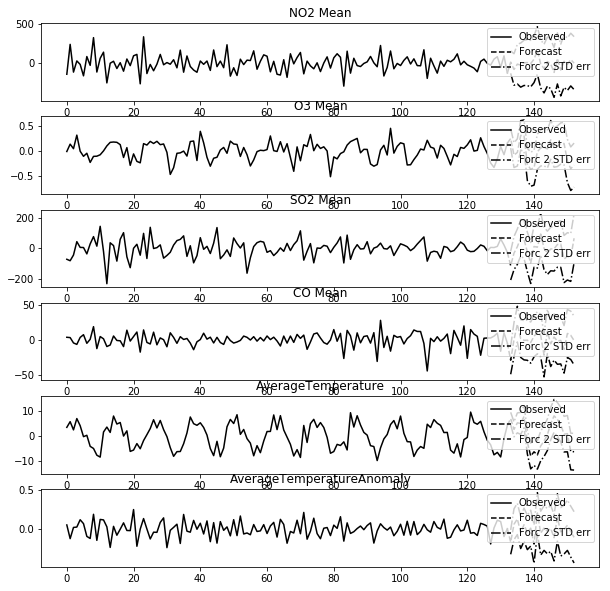

In [27]:
res.plot_forecast(20)
plt.show()

## 6.2 Forecasting Individually on Temperature Change for next (20 Years)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


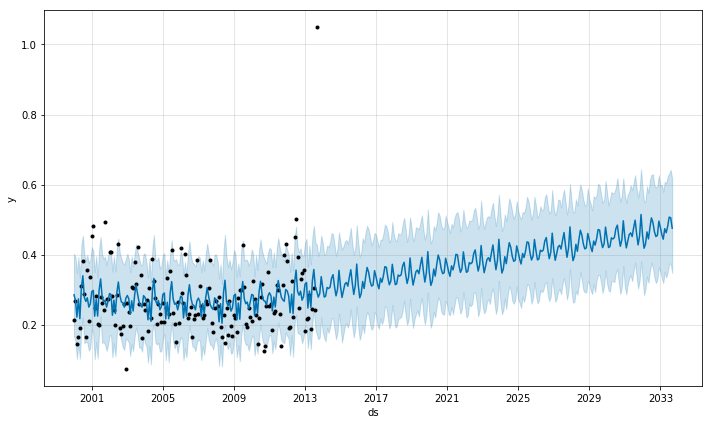

In [28]:
from fbprophet import Prophet

# Create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = df_t.index
t_prophet['y'] = df_t['AverageTemperatureAnomaly'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=20*12)
forecast = m.predict(future)

# Plot the resulting forecast
m.plot(forecast)
plt.show()

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 7. Result Section


We have 

  **-------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# 8. Conclusion Section

lo